In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]
pd.options.display.float_format = '{:,.2f}'.format
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
954,955,60,Male,Hat,Accessories,74,Louisiana,S,Turquoise,Fall,3.50,Yes,Standard,Yes,Yes,18,Credit Card,Every 3 Months
2426,2427,70,Male,Jacket,Outerwear,42,Florida,M,Olive,Fall,4.60,No,Free Shipping,No,No,26,Debit Card,Every 3 Months
3565,3566,49,Female,Handbag,Accessories,52,Pennsylvania,S,Gray,Spring,4.20,No,Store Pickup,No,No,35,PayPal,Monthly
2292,2293,43,Male,T-shirt,Clothing,34,Vermont,S,Beige,Spring,3.80,No,Next Day Air,No,No,31,Debit Card,Monthly
2601,2602,61,Male,Dress,Clothing,33,Mississippi,L,Orange,Winter,2.90,No,Store Pickup,No,No,43,Cash,Monthly
1197,1198,54,Male,Sneakers,Footwear,92,Vermont,L,Violet,Fall,3.90,No,Standard,Yes,Yes,26,PayPal,Annually
1952,1953,57,Male,Shoes,Footwear,82,Maryland,L,Yellow,Summer,4.60,No,2-Day Shipping,No,No,50,Cash,Bi-Weekly
3426,3427,47,Female,Socks,Clothing,35,Oregon,XL,Magenta,Fall,4.80,No,2-Day Shipping,No,No,31,Credit Card,Annually
178,179,61,Male,Skirt,Clothing,43,Idaho,L,Lavender,Fall,4.30,Yes,2-Day Shipping,Yes,Yes,21,PayPal,Quarterly
2138,2139,67,Male,Sweater,Clothing,42,Mississippi,M,Teal,Fall,2.80,No,Next Day Air,No,No,36,Venmo,Quarterly


In [4]:
df.shape

(3900, 18)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


# **Checking for null values**

In [8]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

# Checking for duplicates

In [9]:
df.duplicated().sum()

0

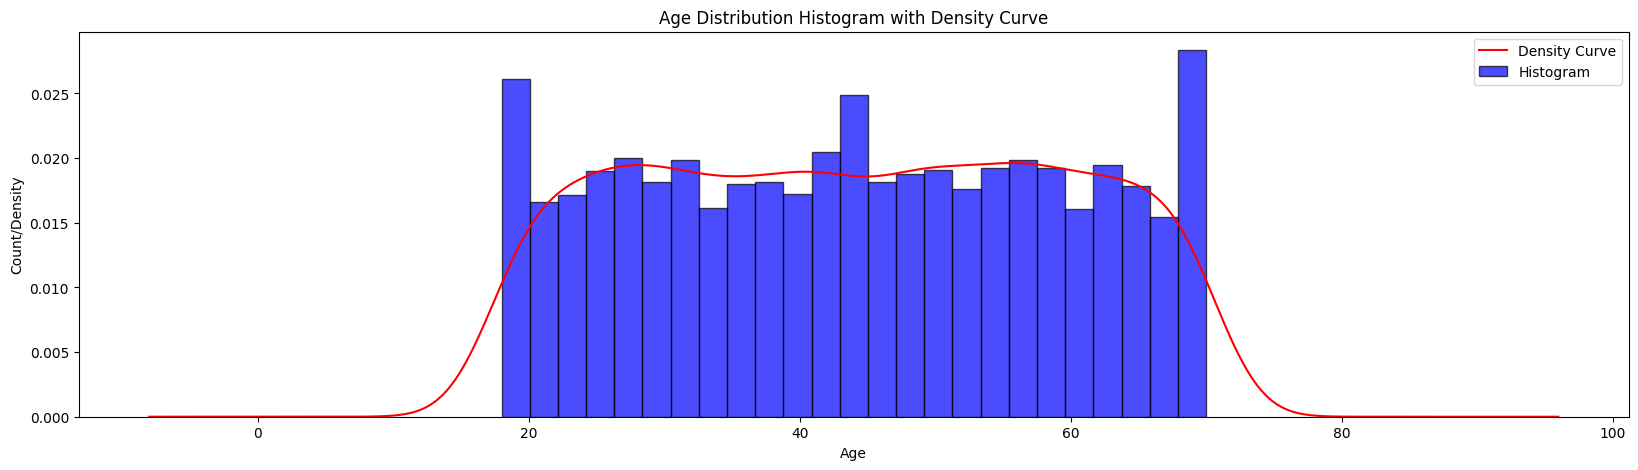

In [10]:
fig,ax=plt.subplots(figsize=(20,5))

ax.hist(df['Age'],bins=25,edgecolor='black',color='blue',alpha=0.7,density=True)
df['Age'].plot(kind='kde',color='red',ax=ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count/Density')
ax.set_title("Age Distribution Histogram with Density Curve")
ax.legend(['Density Curve','Histogram'])
plt.show()


Text(0, 0.5, 'Number of Occurrences')

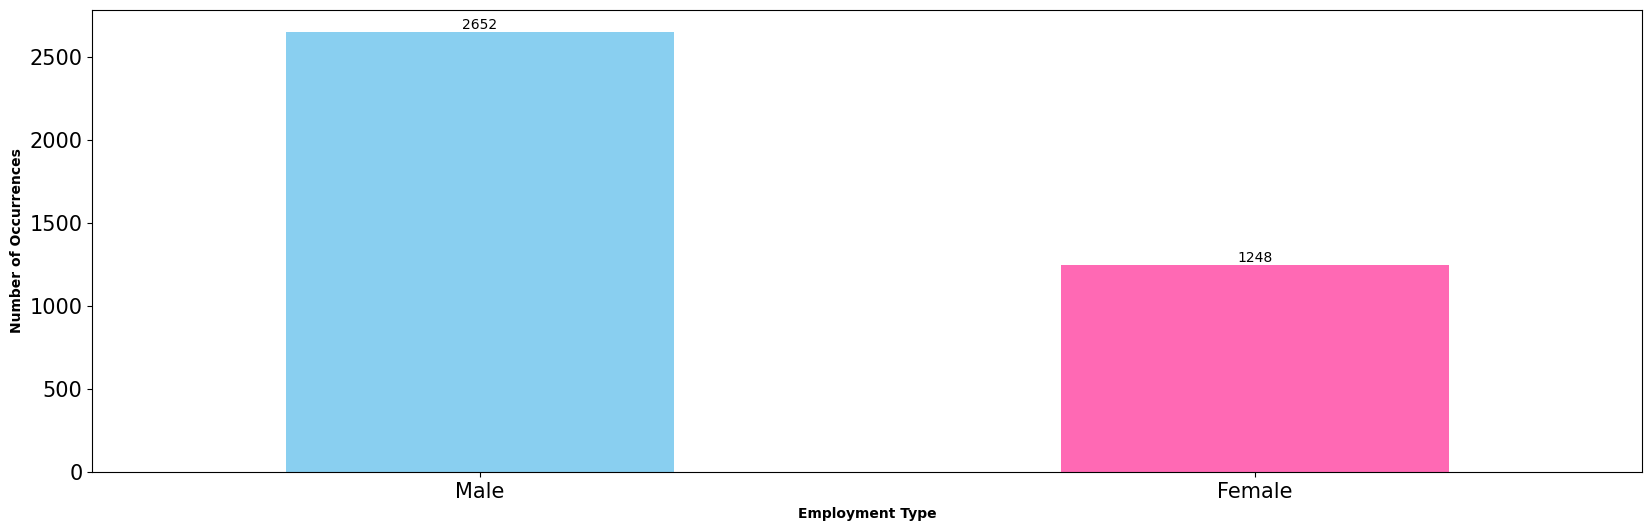

In [11]:
plt.figure(figsize=(20,6))
ax=df['Gender'].value_counts().plot(kind='bar',color=colors,rot=0)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

ax.set_xticklabels(('Male','Female'))
plt.xlabel('Employment Type',weight="bold")
plt.ylabel('Number of Occurrences',weight="bold")

In [12]:
df.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

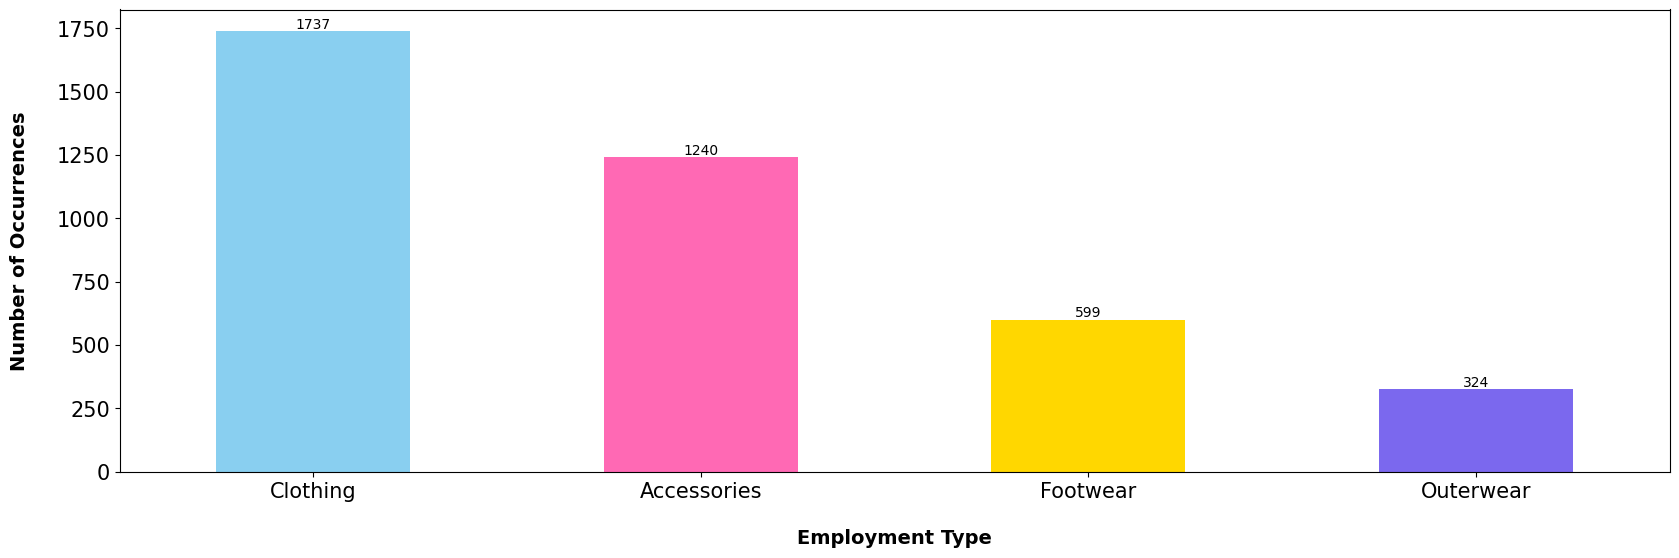

In [13]:
plt.figure(figsize=(20,6))
ax=df.Category.value_counts().plot(kind='bar',color=colors,rot=0)


ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);


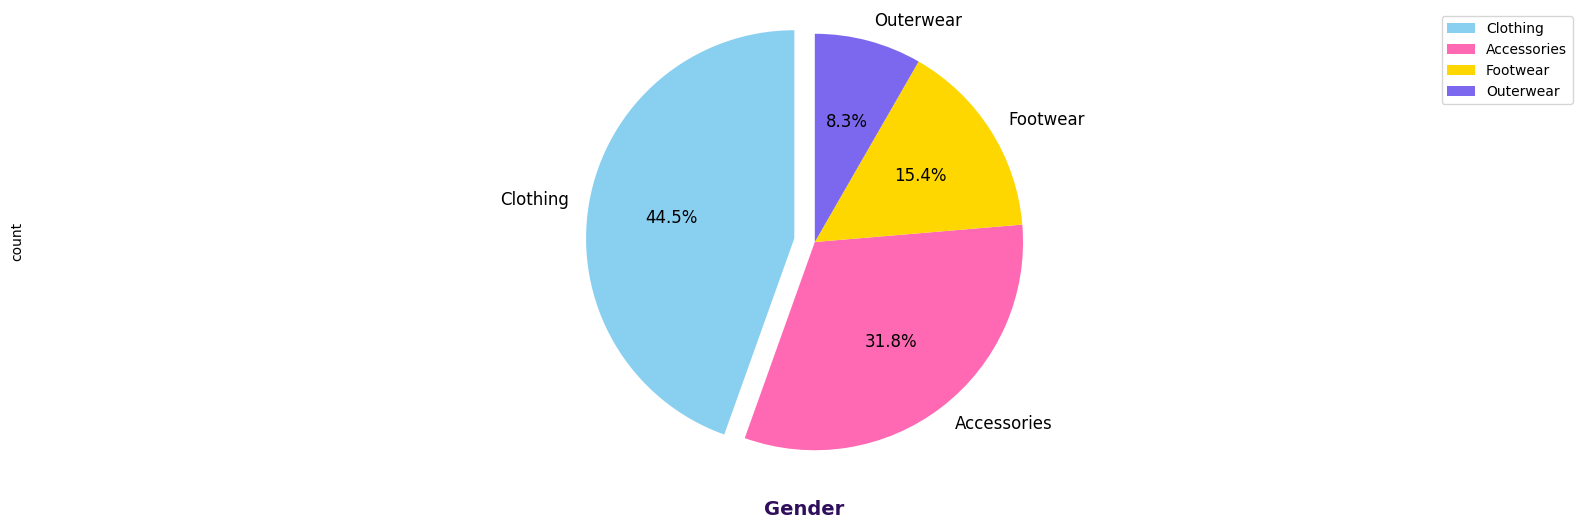

In [14]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0.1, 0.0, 0.0, 0.0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%',startangle=90)
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [15]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

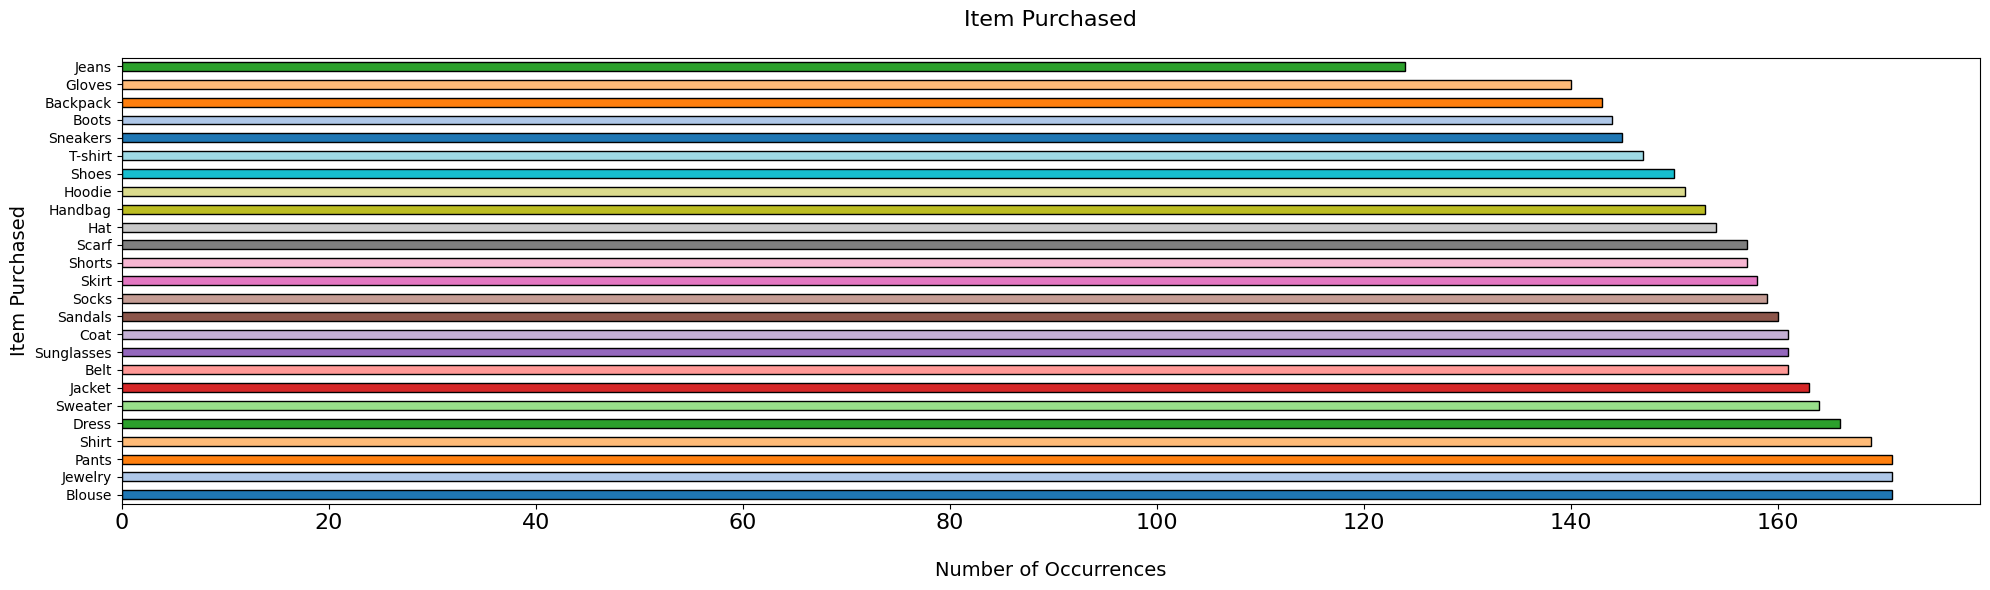

In [16]:
plt.figure(figsize=(20,6))
df["Item Purchased"].value_counts().plot(kind='barh',color=sns.color_palette('tab20'),edgecolor='black')
plt.xlabel('\nNumber of Occurrences',fontsize=14)
plt.ylabel('Item Purchased',fontsize=14)
plt.title('Item Purchased\n',fontsize=16)
plt.xticks(rotation=0,ha='center',fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
df.Location.value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

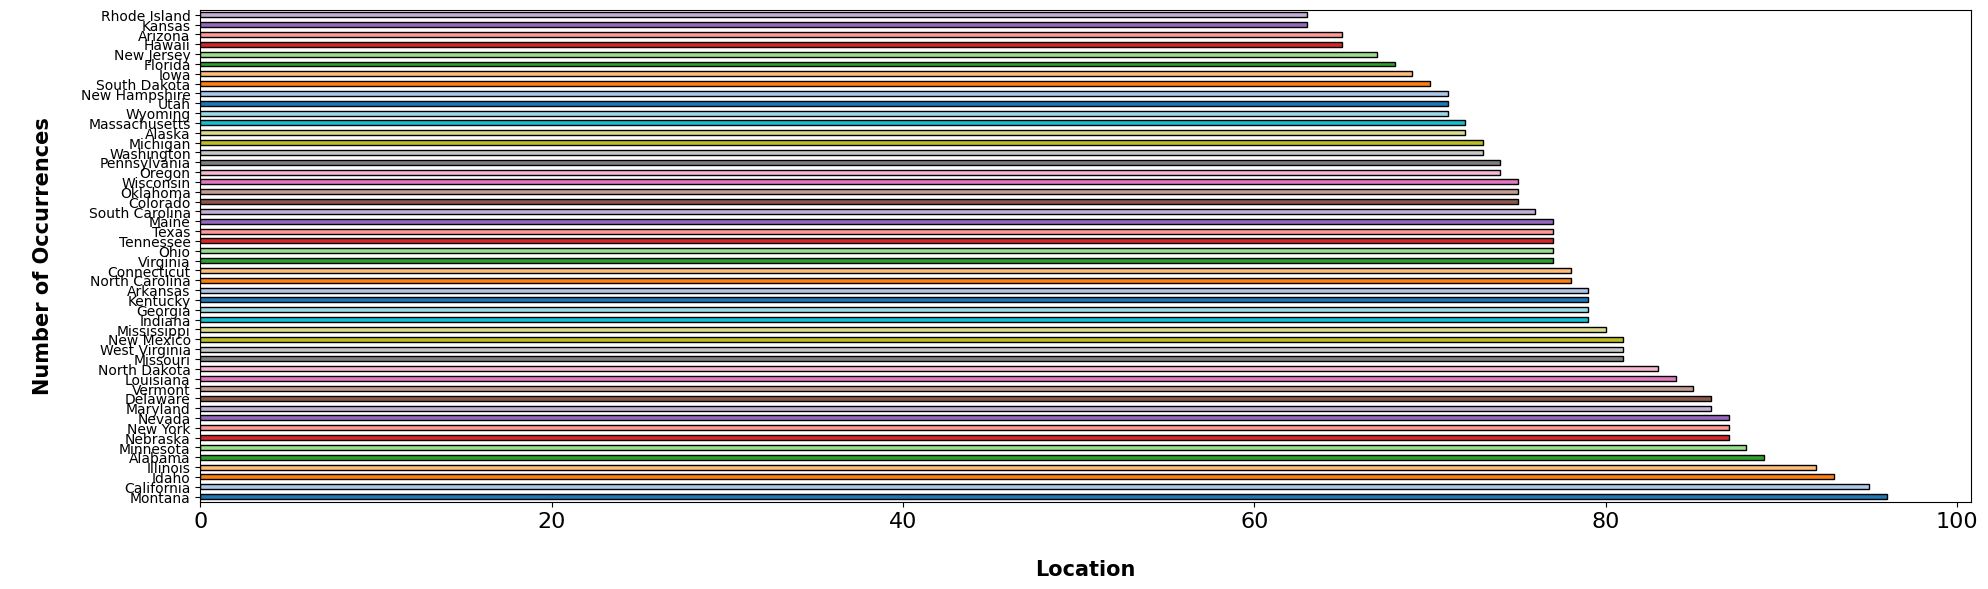

In [18]:
plt.figure(figsize=(20,6))
df.Location.value_counts().plot(kind='barh',color=sns.color_palette('tab20'),edgecolor='black')
plt.xlabel('Location',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('\nNumber of Occurrences',weight='bold',fontsize=15,labelpad=20)
plt.xticks(rotation =0,ha='center',fontsize=16)
plt.tight_layout()
plt.show()

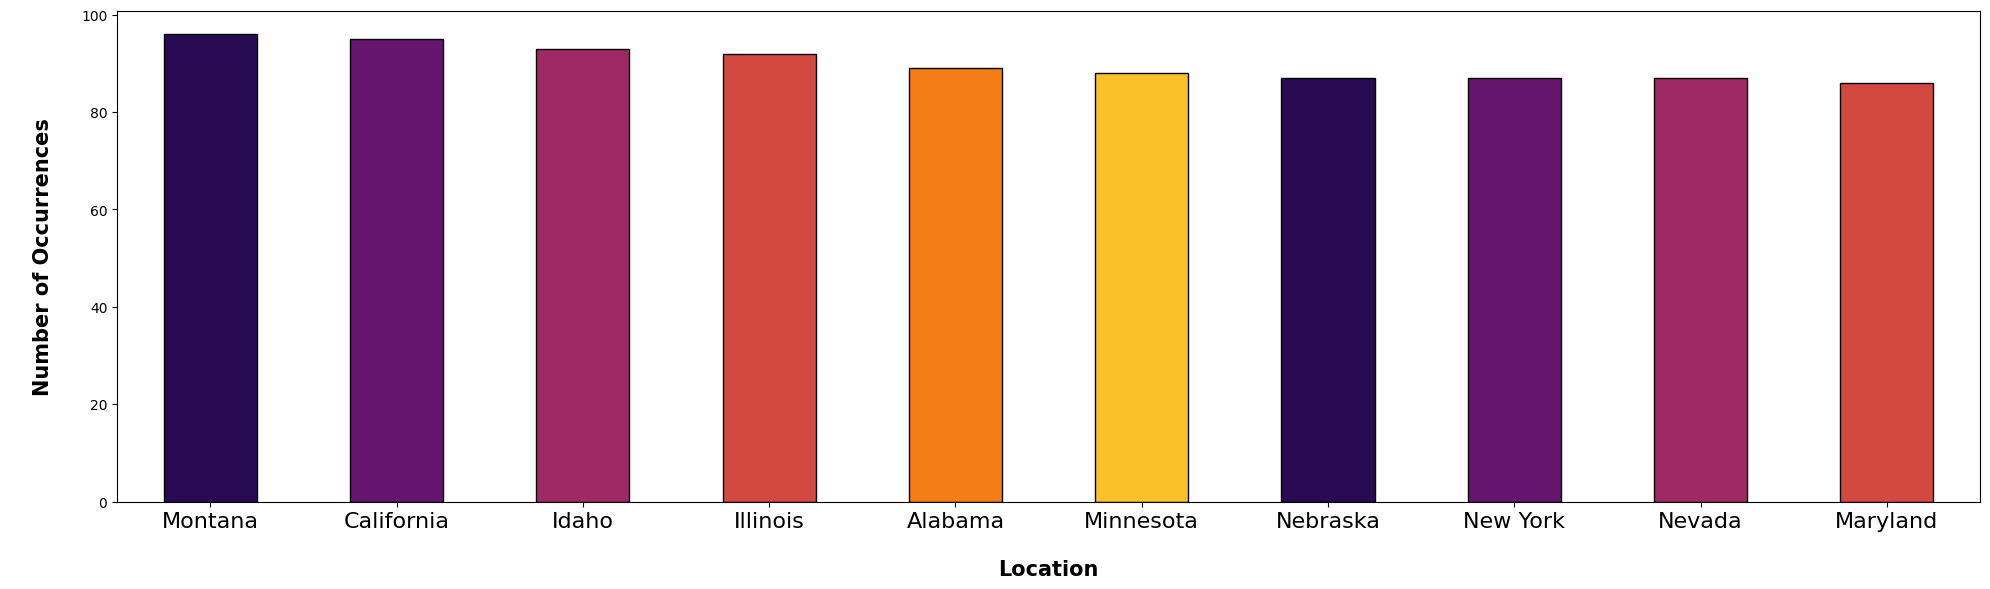

In [19]:
plt.figure(figsize=(20,6))
df.Location.value_counts()[:10].sort_values(ascending=False).plot(kind='bar',color=sns.color_palette('inferno'),edgecolor='black')
plt.xlabel('Location',weight='bold',fontsize=15,labelpad=20)
plt.ylabel('\nNumber of Occurrences',weight='bold',fontsize=15,labelpad=20)
plt.xticks(rotation =0,ha='center',fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

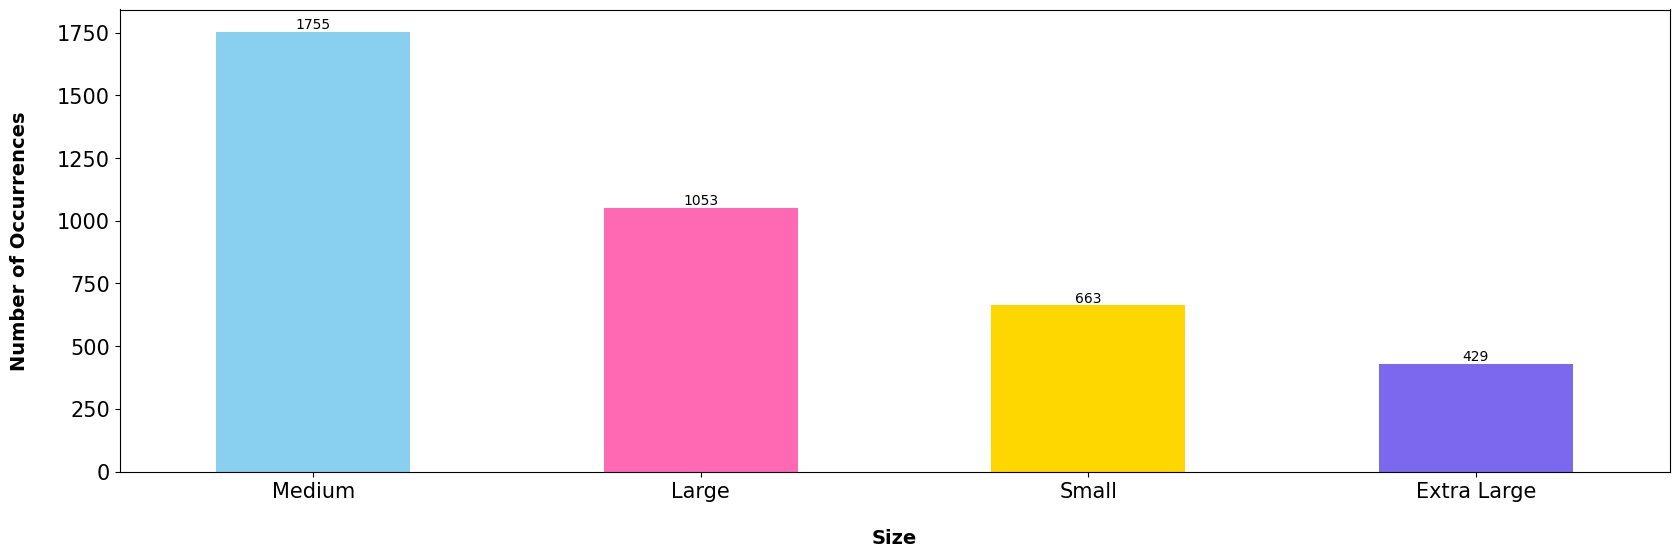

In [21]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20)

In [22]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

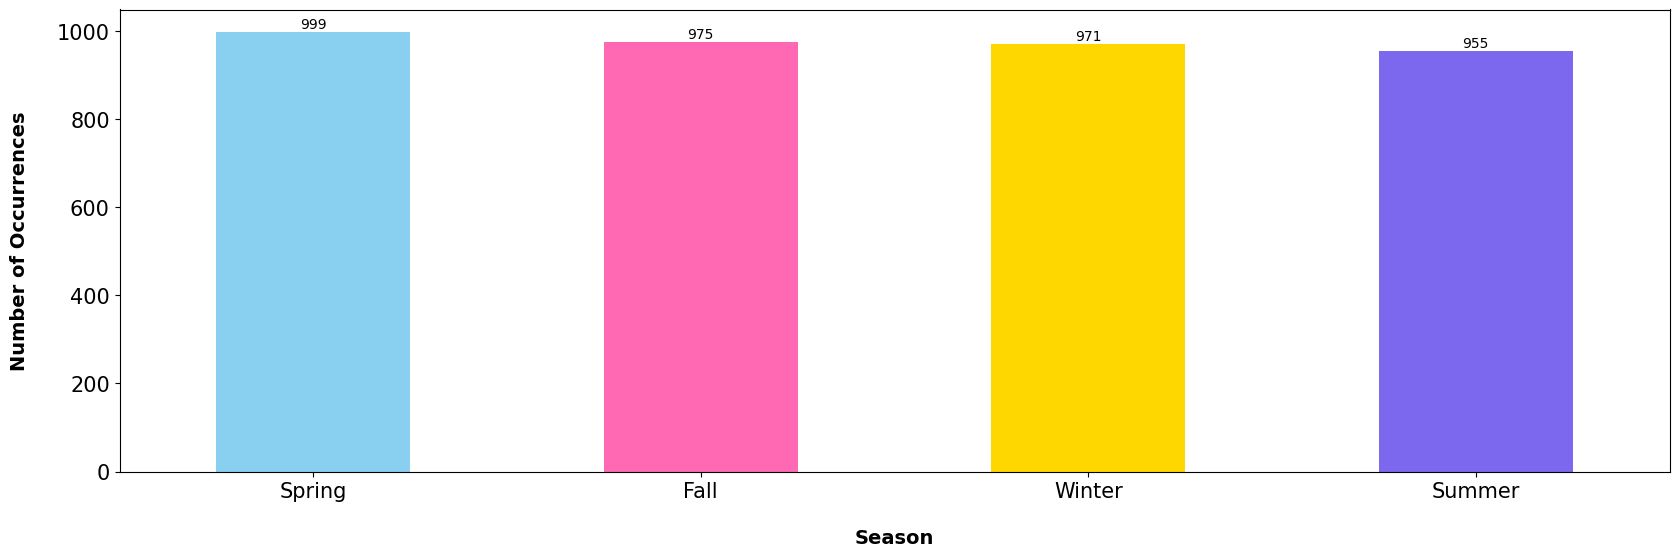

In [23]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20);

In [24]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

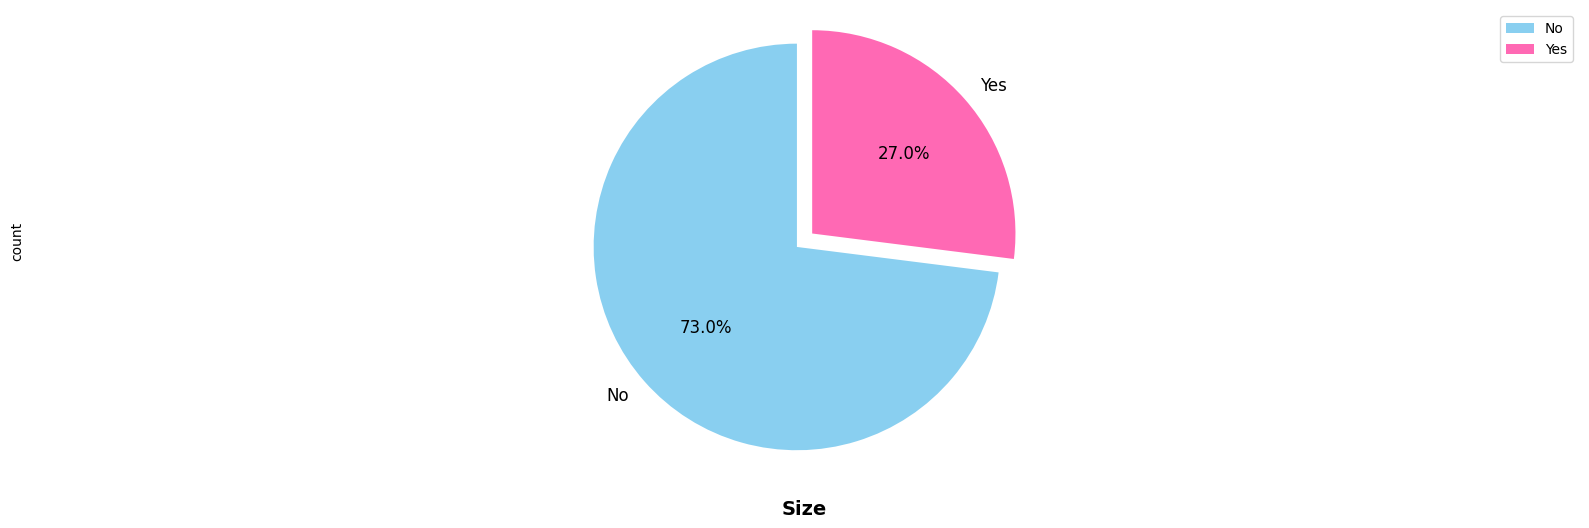

In [25]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%',startangle=90)
plt.xlabel('Size', weight = "bold", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [26]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

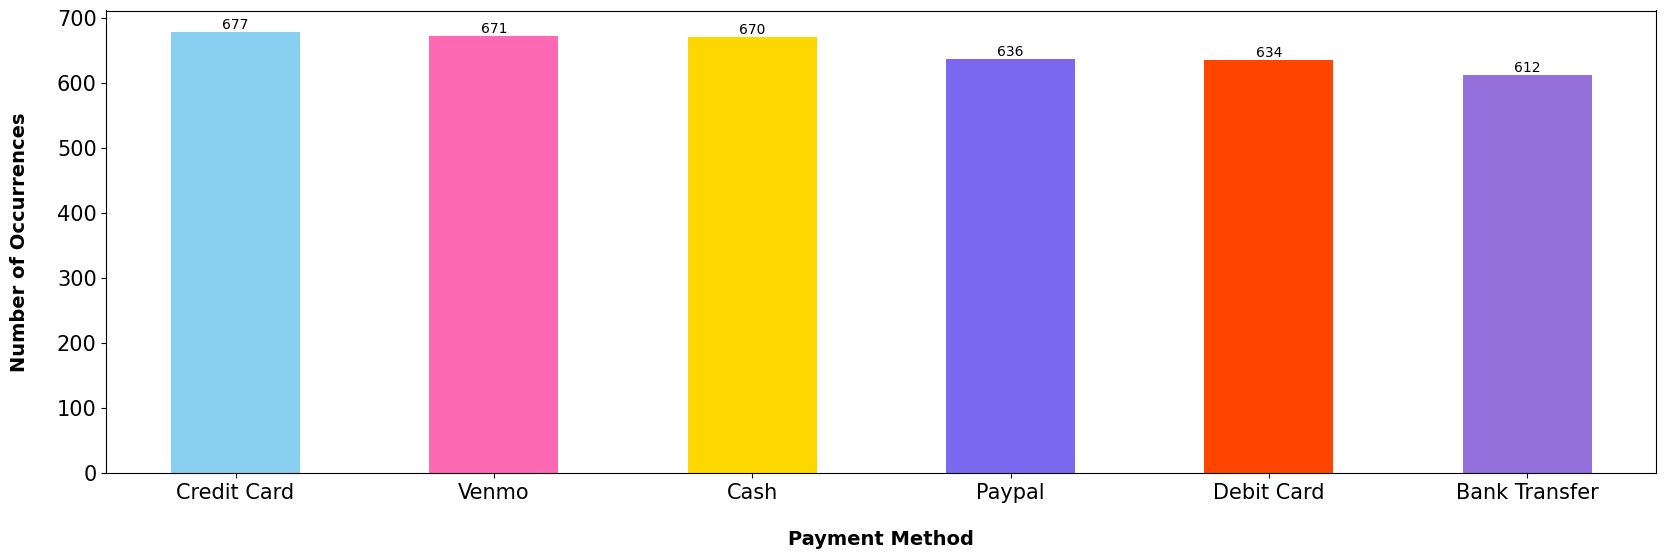

In [27]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20)

In [28]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

Text(0, 0.5, 'Number of Occurrences')

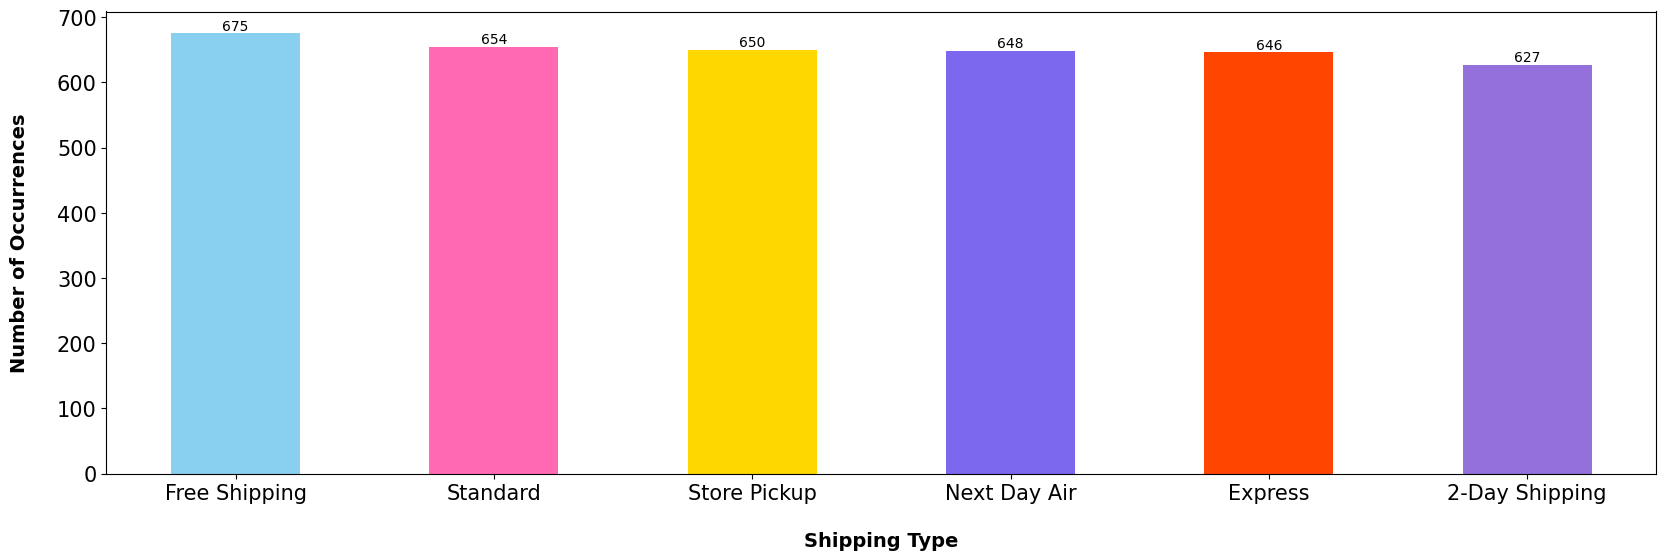

In [29]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", fontsize = 14, labelpad = 20)

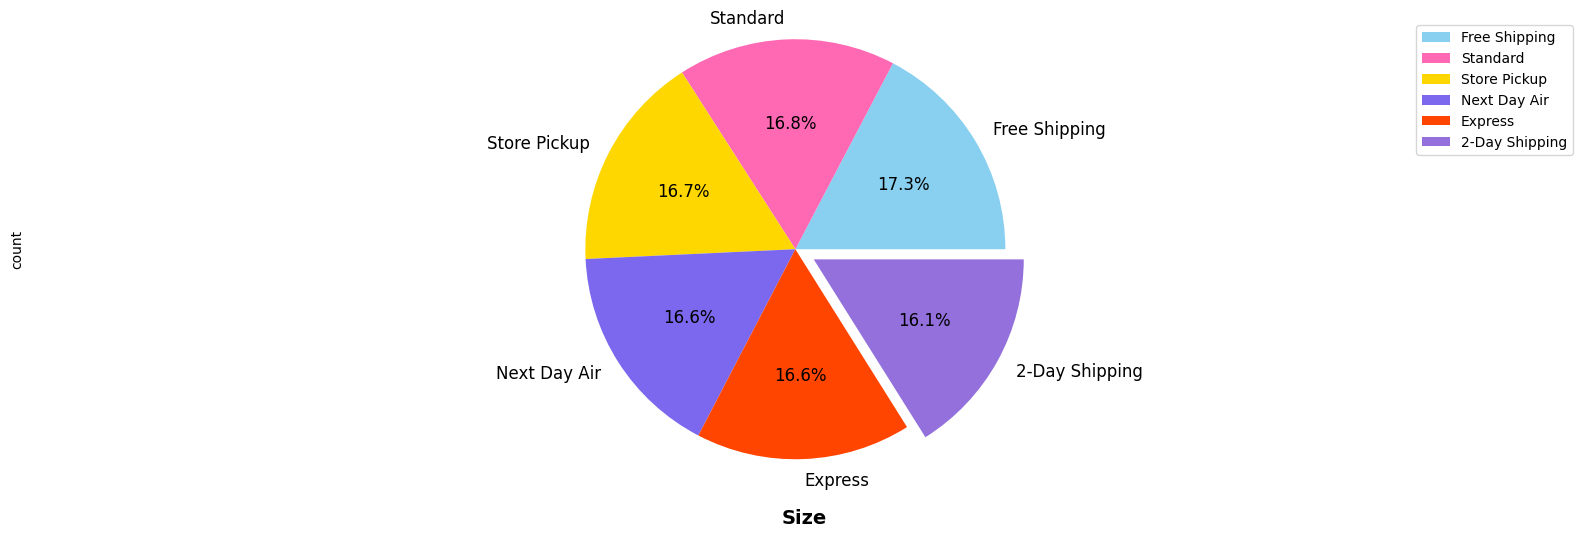

In [30]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold",  fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [31]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

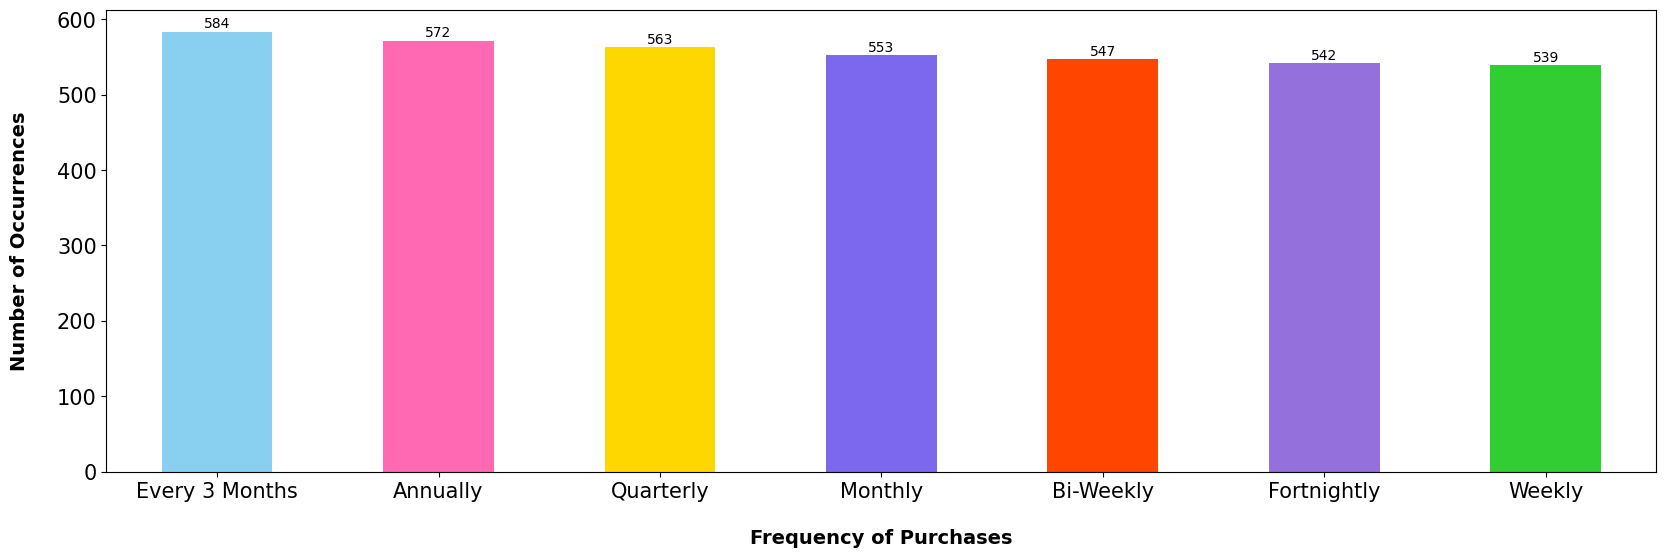

In [32]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold",  fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold",  fontsize = 14, labelpad = 20);

# Average age of customers

In [33]:
average_df=df.Age.mean()
print("Average Age: ",average_df)

Average Age:  44.06846153846154


# Most common item purchased

In [34]:
most_common_item=df['Item Purchased'].mode()[0]
most_common_item

'Blouse'

# Total purchase amount for each category

In [35]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.20,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.50,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.90,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.80,No,Express,No,No,24,Venmo,Weekly


In [36]:
total_purchase_by_category=df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total_purchase_by_category:")
total_purchase_by_category

Total_purchase_by_category:


Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

# Average review rating for male customers and female customers 

In [37]:
avg_rating=df.groupby('Gender')['Review Rating'].mean()
avg_rating

Gender
Female   3.74
Male     3.75
Name: Review Rating, dtype: float64

# Average review rating for male customers and female customers seperatively 

In [38]:
avg_rating_male=df[df['Gender']=='Male']['Review Rating'].mean()

avg_rating_female=df[df['Gender']=='Female']['Review Rating'].mean()

print("Average Review Rating for Male Customers:", avg_rating_male)
print("Average Review Rating for Female Customers:", avg_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


# Most common payment method used by customers

In [39]:
most_common_payment_method=df['Payment Method'].mode()[0]
most_common_payment_method

'PayPal'

# Median purchase amount(USD)

In [40]:
df['Purchase Amount (USD)'].median()

60.0

# How many customers have opted for the Subscription ?

In [41]:
subscription_cnt=df[df['Subscription Status']=='Yes']['Customer ID'].count()
subscription_cnt

1053

# What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?

In [42]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No    59.87
Yes   59.49
Name: Purchase Amount (USD), dtype: float64

# What is the most common season for purchases ?

In [43]:
most_common_season = df['Season'].mode()[0]
most_common_season

'Spring'

# What is the total purchase amount for each gender ?

In [44]:
df.groupby('Gender')['Purchase Amount (USD)'].sum()

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

# What is the average age of customers who made purchases in the Summer season ?

In [45]:
df[df['Season']=='Summer']['Age'].mean()

43.973821989528794

# How many customers used a promo code for their purchase ?

In [46]:
df[df['Promo Code Used']=='Yes']['Customer ID'].count()

1677

# What is the maximum and minimum review rating in the dataset ?

In [47]:
min_review_rating=df['Review Rating'].min()
max_review_rating=df['Review Rating'].max()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


# What is the most common shipping type for customers with a review rating above 4 ?

In [48]:
df[df['Review Rating']>4]['Shipping Type'].mode()[0]

'Standard'

# How many customers have made more than 30 previous purchases ?

In [49]:
df[df['Previous Purchases']>30]['Customer ID'].count()

1549

# What is the average purchase amount for customers who have made more than 30 previous purchases ?

In [50]:
df[df['Previous Purchases']>30]['Purchase Amount (USD)'].mean()

60.02840542285345

# What is the most common payment method for customers who shop in the Winter season ?

In [51]:
df[df['Season']=='Winter']['Payment Method'].mode()[0]

'PayPal'

# What is the total purchase amount for customers with a 'Free Shipping' shipping type ?

In [52]:
df[df['Shipping Type']=='Free Shipping']['Purchase Amount (USD)'].sum()

40777

# What is the average purchase amount for customers who used a discount ?

In [53]:
df[df['Discount Applied']=='Yes']['Purchase Amount (USD)'].mean()

59.27906976744186

# What is the most common category of items purchased by female customers with a review rating below 3 ?

In [54]:
df[(df['Review Rating']>3) & (df['Gender']=='Female')]['Category'].mode()[0]

'Clothing'

# What is the average age of customers who made purchases with a review rating above 4 and used a promo code?

In [55]:
df[(df['Review Rating']>4) & (df['Promo Code Used']=='Yes')]['Age'].mean()

43.9872

# What is the total purchase amount for customers in each location ?

In [56]:
df.groupby('Location')['Purchase Amount (USD)'].sum()

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

# What is the average purchase amount for customers who have a subscription and used credit card as the payment method ?

In [57]:
df[(df['Payment Method']=='Credit Card') & (df['Subscription Status']=='Yes')]['Purchase Amount (USD)'].mean()

58.87709497206704

# What is the frequency distribution of the 'Frequency of Purchases' column ?

In [58]:
df.groupby('Frequency of Purchases')['Customer ID'].count()

Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
Name: Customer ID, dtype: int64

# What is the average purchase amount for each color of items ?

In [59]:
df.groupby('Color')['Purchase Amount (USD)'].mean()

Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64

# KDE plot for Purchase Amount by Season

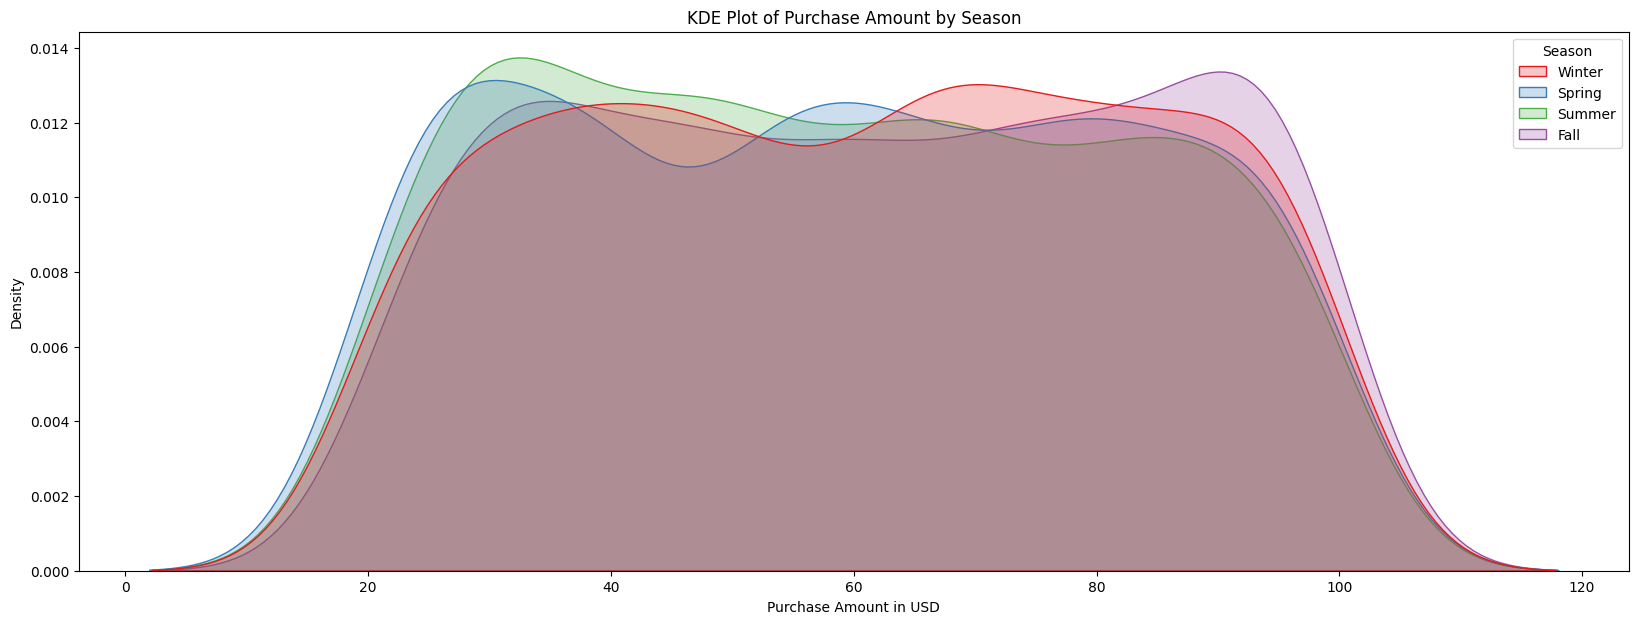

In [60]:
plt.figure(figsize=(20,7))
sns.kdeplot(data=df,x='Purchase Amount (USD)',hue='Season',common_norm=False,fill=True,palette='Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

# What is the most common payment method for customers who purchased items in the Fall season ?

In [61]:
df[df['Season']=='Fall']['Payment Method'].mode()[0]

'Cash'

# How many customers have made a purchase in each category ?

In [62]:
df.groupby('Category')['Customer ID'].count()

Category
Accessories    1240
Clothing       1737
Footwear        599
Outerwear       324
Name: Customer ID, dtype: int64

# What is the average age of customers who purchased accessories with a discount applied ?

In [63]:
df[(df['Discount Applied']=='Yes') & (df['Category']=='Accessories')]['Age'].mean()

44.23941068139963

# What is the total purchase amount for each size of clothing items (XL, L, M, S) ?

In [64]:
df[df['Category']=='Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()

Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64

# What is the total purchase amount for customers who have made more than 40 previous purchases ?

In [65]:
df[df['Previous Purchases']>40]['Purchase Amount (USD)'].sum()

46590

# What is the most common location for customers who purchased socks with a discount applied ?

In [66]:
df[(df['Item Purchased']=='Socks') & (df['Discount Applied']=='Yes')]['Location'].mode()[0]

'Georgia'

# What is the average purchase amount for customers who have a subscription and used Venmo as the payment method, but did not use a promo code ?

In [67]:
df[(df['Payment Method']=='Venmo') & (df['Subscription Status']=='Yes') & (df['Promo Code Used']=='No')]['Purchase Amount (USD)'].mean()

nan

# What is the most common item purchased by customers in Louisiana with a review rating of 4 or higher ?

In [68]:
df[(df['Location']=='Louisiana') & (df['Review Rating']>=4)]['Item Purchased'].mode()[0]

'Sweater'

# What is the total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method ?

In [69]:
df[(df['Payment Method']=='Credit Card') & (df['Season']=='Fall')]['Purchase Amount (USD)'].sum()

9905

# What is the most common category of items purchased by male customers in the Winter season with a review rating below 3 ?

In [70]:
df[(df['Season']=='Winter') & (df['Review Rating']<3) & (df['Gender']=='Male')]['Category'].mode()[0]

'Clothing'

# Histogram of Age Distribution

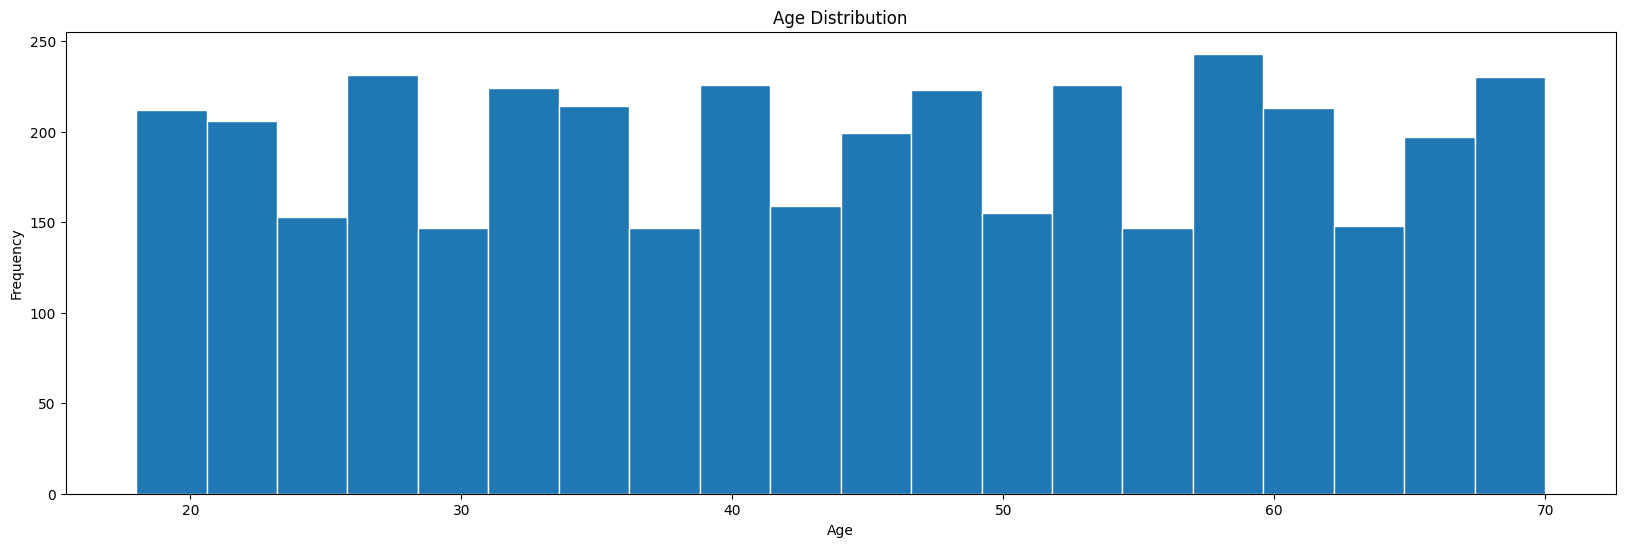

In [71]:
plt.figure(figsize=(20,6))
plt.hist(df['Age'],bins=20,edgecolor='w')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot of Age vs. Review Rating

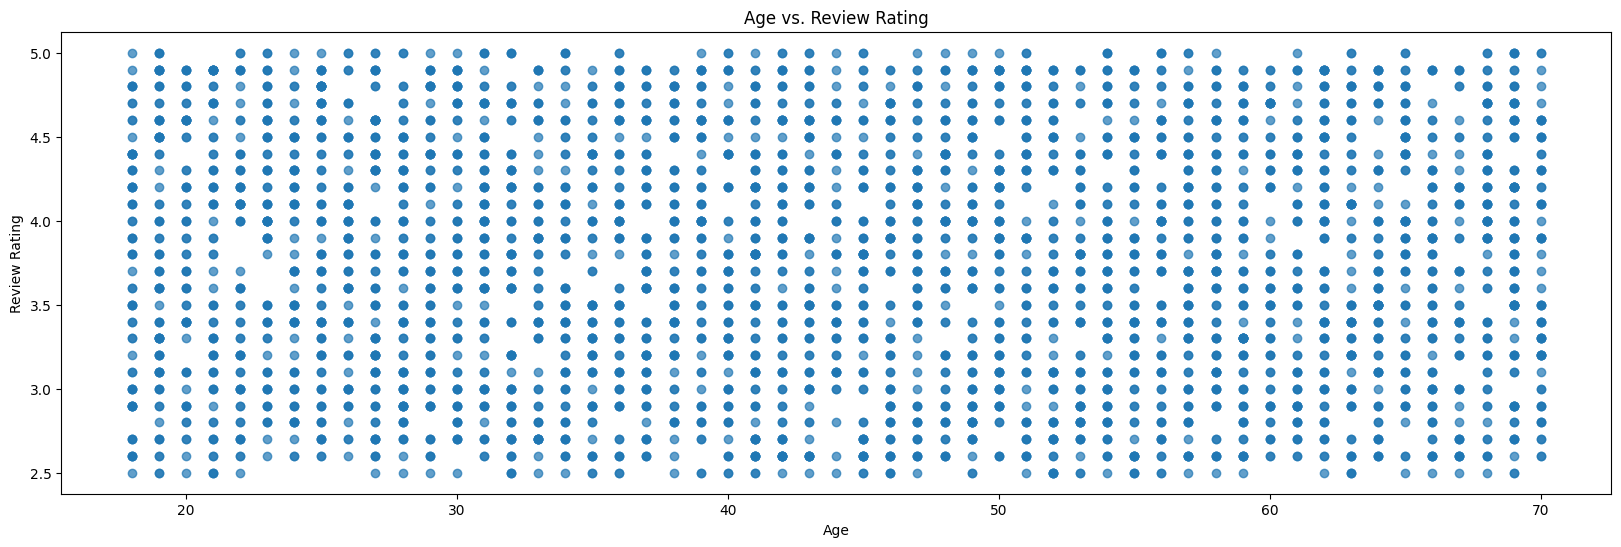

In [72]:
plt.figure(figsize=(20,6))
plt.scatter(df['Age'],df['Review Rating'],alpha=0.7)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

# Bar Chart of Subscription Status by Gender

<Figure size 2000x600 with 0 Axes>

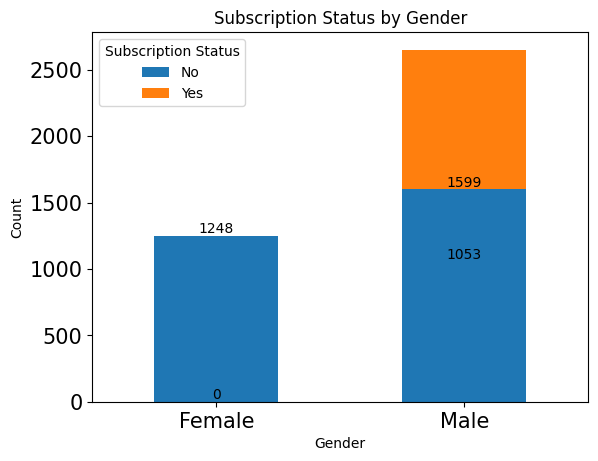

In [73]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize=(20,6))
ax=subscription_gender_counts.plot(kind='bar',stacked=True,rot=0)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

# Bar Plot of Payment Method by Season

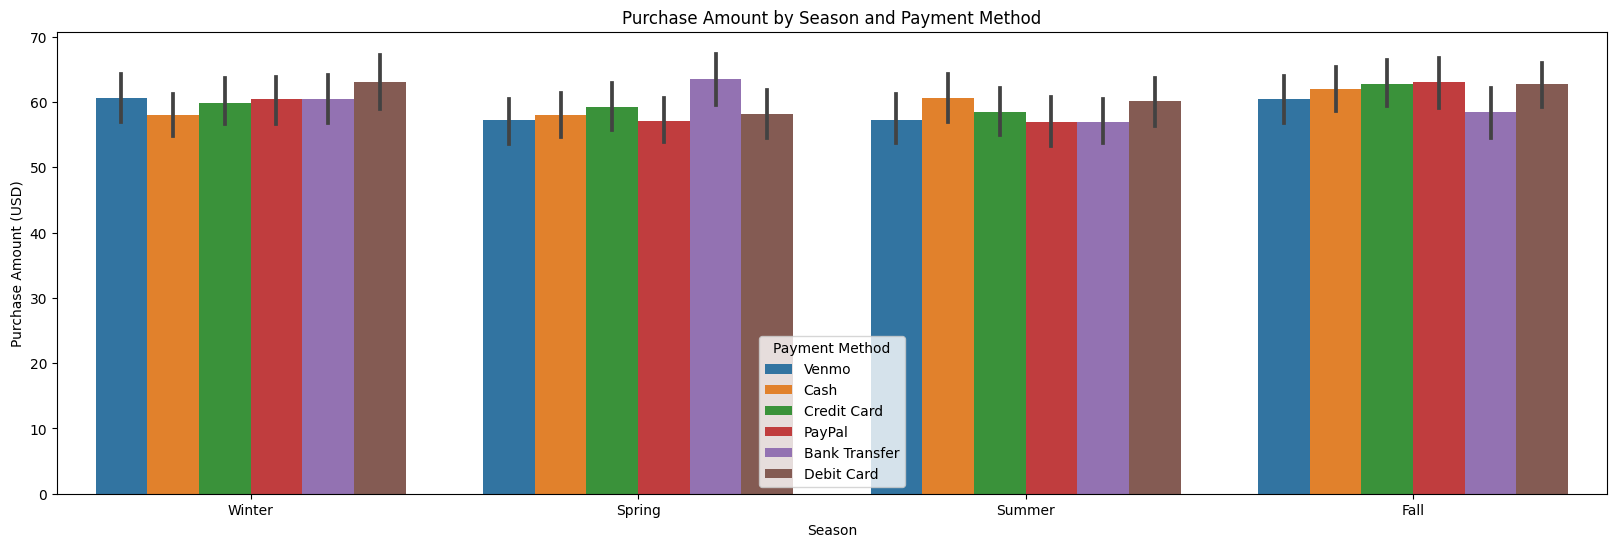

In [74]:
plt.figure(figsize=(20,6))
sns.barplot(x='Season',y='Purchase Amount (USD)',hue='Payment Method',data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')

plt.show()